<a href="https://colab.research.google.com/github/rachaelssmith/CSE450/blob/master/Final_Prove_8_Titanic_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# tip on using google  colab 
# http://www.icyousee.org/titanic.html
import pandas as pd
import numpy as np

In [0]:
# importing tensorflow and keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier


In [0]:

titanic_names = ['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic_file = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTgy1GYq5gZLxaOQ1jF9uzcUPdDryq8oKzOOtAvwVPBQemDw3X0pzp0VLE5ER3g7qNAo669g75CkNMe/pub?output=csv"
titanic = pd.read_csv(titanic_file, header = 0, na_values = "NaN", index_col = 0, names = titanic_names)

titanic


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
titanic["Cabin"] = titanic["Cabin"].str[:1]

cleanup_titanic1 = {"Cabin": {"A": 8, "B":7, "C":6, "D":5, "E":4, "F":3,"G":2, "T":1}
                  }
titanic.replace(cleanup_titanic1, inplace = True)

cleanup_titanic2 = {"Embarked": {"S":0.24,"C": .33, "Q":0.38}
                    }
titanic.replace(cleanup_titanic2, inplace = True)              

cleanup_titanic4 = {"Sex": {"male":.21,"female":.79}
                    }
titanic.replace(cleanup_titanic4, inplace = True) 
                  
titanic["Sex"] = titanic["Sex"].astype('int64')

In [0]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.24
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,6.0,0.33
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.24
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,6.0,0.24
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.24
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.24
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,7.0,0.24
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0.24
890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,6.0,0.33


In [0]:
titanic["Ticket"] = titanic["Ticket"].str[-3:]

titanic["Ticket"] = titanic.groupby(["Ticket"])["Sex"].transform('count')

titanic["Cabin"] = titanic["Cabin"].fillna(-1)
titanic["Embarked"] = titanic["Embarked"].fillna(0)

titanic["Age"] = titanic["Age"].fillna(method = 'ffill')

titanic["Name"] = titanic["Name"].str[:4]
titanic["Name"] = titanic.groupby(["Name"])["Sex"].transform('count')



In [0]:
titanic[titanic.isna().any(axis=1)]
titanic.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin       False
Embarked    False
dtype: bool

In [0]:
titanic = titanic.sample(frac=1)

In [0]:
#split the data into features and targets
targets = titanic['Survived']
targets = np.array(targets)

In [0]:
features = titanic[['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
features = np.array(features)

In [0]:
#30% of the samples will be used for testing.
#the other 70% will be used for training.
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size =.1)
print ("train data shape: "+str(train_features.shape+train_targets.shape))
print ("test data shape: "+str(test_features.shape+test_targets.shape))

train data shape: (801, 10, 801)
test data shape: (90, 10, 90)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_features)

train_data = sc.transform(train_features)
test_data = sc.transform(test_features)

In [0]:

classifier = Sequential()

classifier.add(Dense(500, activation = "relu"))
classifier.add(Dense(250, activation = "relu"))
classifier.add(Dense(1, activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss="binary_crossentropy", metrics = ["accuracy"])


In [0]:
history = classifier.fit(train_features, train_targets, validation_split = 0.1, epochs = 27)

Train on 720 samples, validate on 81 samples
Epoch 1/27
720/720 [==============================] - 0s 272us/step - loss: 0.8010 - accuracy: 0.6375 - val_loss: 0.7366 - val_accuracy: 0.4815
Epoch 2/27
720/720 [==============================] - 0s 121us/step - loss: 0.7130 - accuracy: 0.6694 - val_loss: 0.7715 - val_accuracy: 0.6914
Epoch 3/27
720/720 [==============================] - 0s 118us/step - loss: 0.6629 - accuracy: 0.6861 - val_loss: 1.0236 - val_accuracy: 0.5556
Epoch 4/27
720/720 [==============================] - 0s 118us/step - loss: 0.7592 - accuracy: 0.6806 - val_loss: 0.6261 - val_accuracy: 0.7160
Epoch 5/27
720/720 [==============================] - 0s 120us/step - loss: 0.6231 - accuracy: 0.7111 - val_loss: 0.6245 - val_accuracy: 0.6667
Epoch 6/27
720/720 [==============================] - 0s 126us/step - loss: 0.5724 - accuracy: 0.7222 - val_loss: 0.6941 - val_accuracy: 0.6667
Epoch 7/27
720/720 [==============================] - 0s 120us/step - loss: 0.7002 - accura

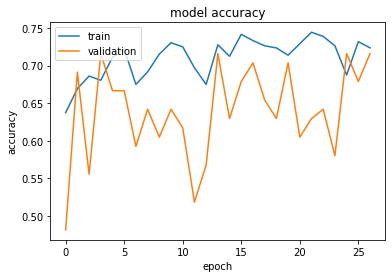

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

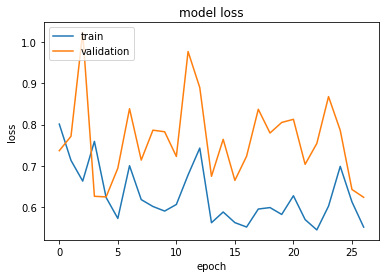

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
predictions = classifier.predict_classes(test_data)

In [0]:
accuracy = accuracy_score(test_targets, predictions)
accuracy

0.6666666666666666